In [1]:
import os

folder_path = r"C:\Users\DELL\Downloads\archive (3)"
print(os.listdir(folder_path))

['retail_sales_dataset.csv']


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [3]:
import pandas as pd

# Correct path with actual file name
data = pd.read_csv(r"C:\Users\DELL\Downloads\archive (3)\retail_sales_dataset.csv")

# View the first few rows
print(data.head())


   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [4]:
#Select Relevant Features

In [5]:
# Select numerical features
features = data[['Quantity', 'Price per Unit', 'Total Amount']]


In [6]:
# features['Age'] = data['Age']  # uncomment if needed


In [7]:
#Normalize the Data

In [8]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [9]:
#Find the Optimal Number of Clusters (Elbow Method)

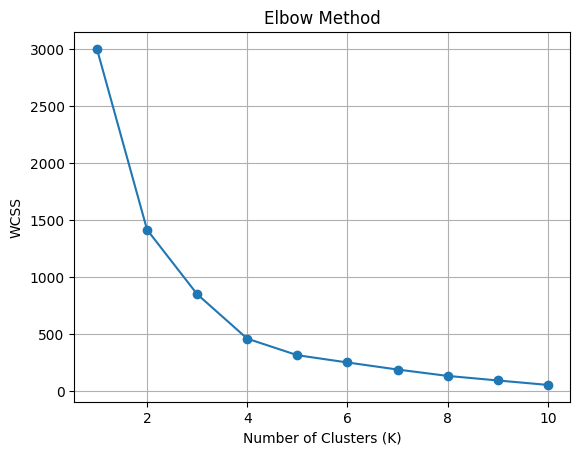

In [10]:
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [11]:
#Apply K-Means Clustering

In [12]:
k = 3  # change if your elbow shows a different value
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_features)


In [13]:
#Assign Cluster Labels to the Data

In [14]:
# Add cluster labels to the original data
data['Cluster'] = clusters

# View some results
print(data[['Customer ID', 'Quantity', 'Price per Unit', 'Total Amount', 'Cluster']].head())


  Customer ID  Quantity  Price per Unit  Total Amount  Cluster
0     CUST001         3              50           150        0
1     CUST002         2             500          1000        2
2     CUST003         1              30            30        1
3     CUST004         1             500           500        2
4     CUST005         2              50           100        1


In [15]:
#Visualize the Clusters (2D Plot)

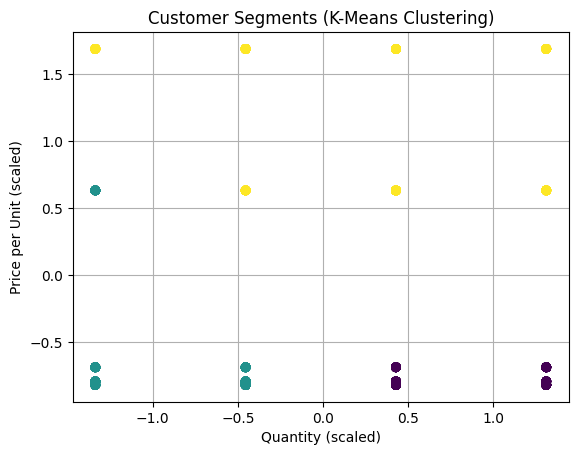

In [16]:
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=clusters, cmap='viridis')
plt.title("Customer Segments (K-Means Clustering)")
plt.xlabel("Quantity (scaled)")
plt.ylabel("Price per Unit (scaled)")
plt.grid(True)
plt.show()
